In [1]:
!pip install datasets
!pip install transformers

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 480.6/480.6 kB 15.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 179.3/179.3 kB 7.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 8.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 10.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver d

In [2]:
model = "bert-large-uncased-whole-word-masking-finetuned-squad"

#Dataset Files
training_file = "/content/drive/MyDrive/Usable_Dataset/Q&A/train_dataset.json"
validation_file = "/content/drive/MyDrive/Usable_Dataset/Q&A/validate_dataset.json"
test_file = "/content/drive/MyDrive/Usable_Dataset/Q&A/test_dataset.json"

#Batch_size for training
batch_size = 32

In [3]:
#Loading the Dataset
from datasets import load_dataset
dataset = load_dataset('json', data_files={'train': training_file, 'validation': validation_file, 'test': test_file}, field='data')
#Viewing the attributes and features of the datasets
print(dataset)

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['title', 'id', 'context', 'question', 'answer'],
        num_rows: 1986
    })
    validation: Dataset({
        features: ['title', 'id', 'context', 'question', 'answer'],
        num_rows: 228
    })
    test: Dataset({
        features: ['title', 'id', 'context', 'question', 'answer'],
        num_rows: 168
    })
})


In [4]:
import transformers
from transformers import AutoTokenizer

#Fetching the Fast Tokenizer(if available) for the ML model
tokenizer = AutoTokenizer.from_pretrained(model)
assert isinstance(tokenizer, transformers.PreTrainedTokenizerFast)

#Function to prepare the train examples for training
def prepare_train_samples(examples):
    max_length = 480    #max length of the input(question+context)
    doc_stride = 128    #length of overlap between consecutive samples of the same example

    #Tokenizing with truncation and padding, but keeping the overflows using a stride.
    tokenized_examples = tokenizer(
        examples["question"],
        examples["context"],
        truncation="only_second",
        max_length=max_length,
        stride=doc_stride,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )

    #One example might give us several samples if it has a long context
    #a mapping indicating the map from the sample to its corresponding example
    sample_mapping = tokenized_examples.pop("overflow_to_sample_mapping")

    #offset mappings give us a map from token to character position spans in the original context
    offset_mapping = tokenized_examples.pop("offset_mapping")

    #labeling of the examples with the start and end character positions of the answer
    tokenized_examples["start_positions"] = []
    tokenized_examples["end_positions"] = []

    for i, offsets in enumerate(offset_mapping):
        input_ids = tokenized_examples["input_ids"][i]

        #the impossible answers are marked with the index of the CLS token.
        cls_index = input_ids.index(tokenizer.cls_token_id)

        #Grab the sequence corresponding to that sample (to know what is the context and what is the question).
        sequence_ids = tokenized_examples.sequence_ids(i)

        #One example can give several samples
        #fetching the original example number for the sample
        example_index = sample_mapping[i]
        answer = examples["answer"][example_index]

        #Start/end character indexes for the answer in the example
        start_char_index = answer["answer_start"]
        end_char_index = answer["answer_end"] + 1

        #Start token index for the current sample context
        token_start_index = 0
        while sequence_ids[token_start_index] != 1:
            token_start_index += 1

        #End token index for the current sample context
        token_end_index = len(input_ids) - 1
        while sequence_ids[token_end_index] != 1:
            token_end_index -= 1

        #Detect if the answer is out of the span and label the sample with the CLS index
        if not (offsets[token_start_index][0] <= start_char_index and offsets[token_end_index][1] >= end_char_index):
            tokenized_examples["start_positions"].append(cls_index)
            tokenized_examples["end_positions"].append(cls_index)
        #bringing the token_start_index and token_end_index to the answer_start_index and the answer_end_index respectively
        #the last offset is considered in case of the last word answer
        else:
            while token_start_index < len(offsets) and offsets[token_start_index][0] <= start_char_index :
                token_start_index += 1
            tokenized_examples["start_positions"].append(token_start_index - 1)
            while offsets[token_end_index][1] >= end_char_index:
                token_end_index -= 1
            tokenized_examples["end_positions"].append(token_end_index + 1)

    return tokenized_examples

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [5]:
tokenized_dataset = dataset.map(prepare_train_samples, batched=True, remove_columns=dataset["train"].column_names)

Map:   0%|          | 0/1986 [00:00<?, ? examples/s]

Map:   0%|          | 0/228 [00:00<?, ? examples/s]

Map:   0%|          | 0/168 [00:00<?, ? examples/s]

In [6]:
#Fine Tuning
from transformers import AutoModelForQuestionAnswering, TrainingArguments, Trainer

#fetching the pre-trained model
model = AutoModelForQuestionAnswering.from_pretrained(model)

#Not changing the base parameters of the model(Non-Task specific layer)
for param in model.base_model.parameters():
    param.requires_grad = False

#Defining the Training Arguments
args = TrainingArguments(
    f"test-squad",
    evaluation_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_dir = './logs',
    logging_steps = 10
)

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [7]:

#Fetching the Data Collator to batch the processed examples
from transformers import default_data_collator
data_collator = default_data_collator

In [8]:
trainer = Trainer(
    model,
    args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)

#Train the model (with evaluation loss only)
trainer.train()

<ipython-input-8-b3a5e2eb30f0>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


TrainOutput(global_step=256, training_loss=0.5793279986828566, metrics={'train_runtime': 803.0191, 'train_samples_per_second': 10.112, 'train_steps_per_second': 0.319, 'total_flos': 7069781977574400.0, 'train_loss': 0.5793279986828566, 'epoch': 4.0})

In [9]:
#Saving the trained model
trainer.save_model("./LegalBERT_Trained")

In [ ]:
tokenizer.save_pretrained('./LegalBERT_Trained')

In [10]:
!zip -r LegalBERT.zip ./LegalBERT_Trained

  adding: LegalBERT_Trained/ (stored 0%)
  adding: LegalBERT_Trained/tokenizer_config.json (deflated 76%)
  adding: LegalBERT_Trained/special_tokens_map.json (deflated 42%)
  adding: LegalBERT_Trained/tokenizer.json (deflated 71%)
  adding: LegalBERT_Trained/model.safetensors (deflated 7%)
  adding: LegalBERT_Trained/training_args.bin (deflated 51%)
  adding: LegalBERT_Trained/config.json (deflated 47%)
  adding: LegalBERT_Trained/vocab.txt (deflated 53%)


In [11]:
#Evaluation
#Function to prepare the validation examples for evaluation
def prepare_test_samples(examples):
    max_length = 480    #max length of input(question + context)
    doc_stride = 128    #length of overlap between consecutive samples of the same example

    #Tokenizing with truncation and padding, but keeping the overflows using a stride
    tokenized_examples = tokenizer(
        examples["question"],
        examples["context"],
        truncation="only_second",
        max_length=max_length,
        stride=doc_stride,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )

    #One example might give us several samples if it has a long context
    #a mapping indicating the map from the sample to its corresponding example
    sample_mapping = tokenized_examples.pop("overflow_to_sample_mapping")

    #recording the example_id that gave us this sample
    tokenized_examples["example_id"] = []

    for i in range(len(tokenized_examples["input_ids"])):
        #Grab the sequence corresponding to that sample (to know what is the context and what is the question).
        sequence_ids = tokenized_examples.sequence_ids(i)

        #One example can give several samples
        #fetching the original example number for the sample
        sample_index = sample_mapping[i]
        #apeending the example_id for fetching the reference answer for evaluation
        tokenized_examples["example_id"].append(examples["id"][sample_index])

        #the offset_mapping of tokens that are not part of the context is set to None
        tokenized_examples["offset_mapping"][i] = [
            (o if sequence_ids[k] == 1 else None)
            for k, o in enumerate(tokenized_examples["offset_mapping"][i])
        ]

    return tokenized_examples

In [12]:
#preparing the validation input
test_samples = dataset["test"].map(
    prepare_test_samples,
    batched=True,
    remove_columns=dataset["test"].column_names
)

#Getting the raw predictions on the test set
raw_predictions = trainer.predict(test_samples)

Map:   0%|          | 0/168 [00:00<?, ? examples/s]

In [13]:
from tqdm.auto import tqdm
import numpy as np
import collections

#Function to find the best possible answers using the raw predictions
def postprocess_qa_predictions(examples, samples, raw_predictions, best_size = 20, max_answer_length = 100):
    #fetching the start and end scores for the predicted answers
    all_start_logits, all_end_logits = raw_predictions

    #Building a mapping of examples to its samples list
    example_id_to_index = {k: i for i, k in enumerate(examples["id"])}
    samples_per_example = collections.defaultdict(list)
    for i, sample in enumerate(samples):
        samples_per_example[example_id_to_index[sample["example_id"]]].append(i)

    #final predictions to be worked from the raw predictions
    predictions = collections.OrderedDict()

    for example_index, example in enumerate(tqdm(examples)):
        #indices of the samples associated to the current example.
        sample_indices = samples_per_example[example_index]

        valid_answers = []                #the list of valid predicted answers for the example
        context = example["context"]      #the context for the example

        #Looping through all the samples associated to the current example.
        for sample_index in sample_indices:
            #fetching the predictions of the model for this sample
            start_logits = all_start_logits[sample_index]
            end_logits = all_end_logits[sample_index]

            #Mapping to map the logit indexes to the characters in the context
            offset_mapping = samples[sample_index]["offset_mapping"]

            #Fetching the top 'best_size' start and end logits
            start_indexes = np.argsort(start_logits)[-1 : -best_size - 1 : -1].tolist()
            end_indexes = np.argsort(end_logits)[-1 : -best_size - 1 : -1].tolist()

            #Looping through all combinations of start and end indexes to find the best valid answer among all
            for start_index in start_indexes:
                for end_index in end_indexes:
                    #Not considering answers which are out of the context or not in the context
                    if (
                        start_index >= len(offset_mapping)
                        or end_index >= len(offset_mapping)
                        or offset_mapping[start_index] is None
                        or offset_mapping[end_index] is None
                    ):
                        continue

                    #Not considering answers with length < 0 or > max_answer_length
                    if end_index < start_index or end_index - start_index + 1 > max_answer_length:
                        continue

                    #Appending the valid answer along with its final score
                    #Final score = start_score + end_score
                    start_char = offset_mapping[start_index][0]
                    end_char = offset_mapping[end_index][1]
                    valid_answers.append(
                        {
                            "score": start_logits[start_index] + end_logits[end_index],
                            "text": context[start_char: end_char]
                        }
                    )
        #Finding the best answer among all the possible valid answers based on the final score
        if len(valid_answers) > 0:
            best_answer = sorted(valid_answers, key=lambda x: x["score"], reverse=True)[0]
        #To avoid failure of no answers, we create a blank answer with score = 0.0
        else:
            best_answer = {"text": "", "score": 0.0}

        predictions[example["id"]] = best_answer["text"]
    return predictions

In [14]:
test_samples.set_format(type=test_samples.format["type"], columns=list(test_samples.features.keys()))

#finding the final predictions (the best possible answers)
final_predictions = postprocess_qa_predictions(dataset["test"], test_samples, raw_predictions.predictions)

  0%|          | 0/168 [00:00<?, ?it/s]

In [15]:
#Constructing the predicted and reference answer sets for evaluation
predictions = tuple([v for k, v in final_predictions.items()])
references = []
for ex in dataset['test']:
    references.append(ex["context"][ex["answer"]["answer_start"] : ex["answer"]["answer_end"]+1])
references = tuple(references)

In [16]:
#Evaluation Metric Function
import re
from collections import Counter

#Function to compute the Accuracy and the F1 score
#Predictions -> Predictions by the model
#References -> Reference items, to compare with the predictions
def compute(predictions, references):
    predictions_score = 0
    common_cnt = 0
    predicted_cnt = 0
    reference_cnt = 0
    predictions = list(predictions)
    references = list(references)
    wtclass_cnt = [0, 0, 0, 0, 0]

    for i in range(len(predictions)) :
        #Converting all the lower case
        references[i] = references[i].lower()
        predictions[i] = predictions[i].lower()

        #Removing the punctuations
        references[i] = re.sub(r'[^\w\s]', ' ', references[i])
        predictions[i] = re.sub(r'[^\w\s]', ' ', predictions[i])

        #Fetching the individual tokens
        references[i] = references[i].split()
        predictions[i] = predictions[i].split()

        #Finding the number of common words between the predicted item and the reference item
        cnt_common = sum(( Counter(references[i]) & Counter(predictions[i]) ).values())

        #Evaluating the difference counts for f1 measurement
        common_cnt += cnt_common
        predicted_cnt += len(predictions[i])
        reference_cnt += len(references[i])

        #Evaluating the match fraction of the prediction with the reference
        match_ratio = cnt_common / len(references[i])

        #Evaluating the scores based on the amount of match
        if match_ratio >= 0.25 and match_ratio < 0.5 :
            predictions_score += 1
            wtclass_cnt[1] += 1
        elif match_ratio >= 0.5 and match_ratio < 0.75 :
            predictions_score += 2
            wtclass_cnt[2] += 1
        elif match_ratio >= 0.75 and match_ratio < 1 :
            predictions_score += 3
            wtclass_cnt[3] += 1
        elif match_ratio == 1 :
            predictions_score += 4
            wtclass_cnt[4] += 1
        else :
            wtclass_cnt[0] += 1

    #Total score for references
    reference_score = 4 * len(references)

    #Calculating Evaluation Metrics
    accuracy = predictions_score / reference_score * 100
    precision = common_cnt / predicted_cnt
    recall = common_cnt / reference_cnt
    F1 = ((2 * precision * recall) / (precision + recall)) * 100
    EM = (wtclass_cnt[4] / len(references)) * 100

    #Sending the result
    metric = dict()
    metric['accuracy'] = accuracy
    metric['precision'] = precision
    metric['recall'] = recall
    metric['f1'] = F1
    metric['em'] = EM
    metric['wtclass_cnt'] = wtclass_cnt
    return metric


In [17]:

#Evaluating and printing the results
result = compute(predictions, references)

print("Accuracy : " + str(result['accuracy']))
print("Precision : " + str(result['precision']))
print("Recall : " + str(result['recall']))
print("F1 : " + str(result['f1']))
print("Exact Match : " + str(result['em']))

Accuracy : 84.22619047619048
Precision : 0.9358513189448441
Recall : 0.6437113402061856
F1 : 76.27656975323724
Exact Match : 77.38095238095238


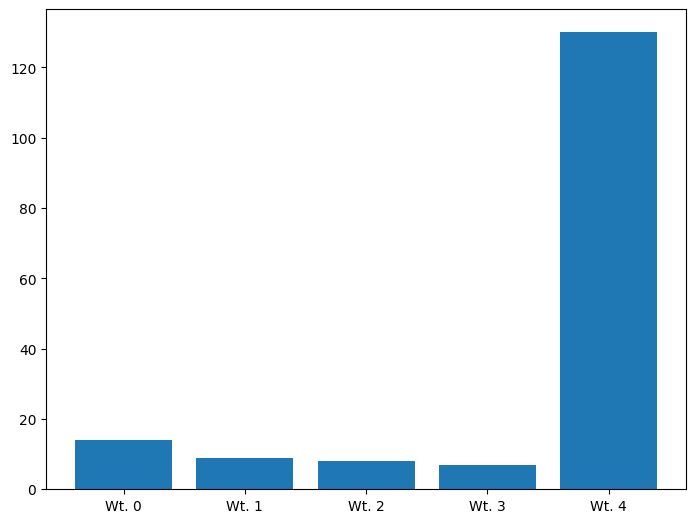

In [18]:
#plotting the bar graph for the distribution of answers based on weight classes
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
wtclasses = ['Wt. 0', 'Wt. 1', 'Wt. 2', 'Wt. 3', 'Wt. 4']
answer_cnt = result['wtclass_cnt']
ax.bar(wtclasses, answer_cnt)
plt.show()